<hr style="border-width:3px; border-color:coral"/>
# Reading and plotting data from file
<hr style="border-width:3px; border-color:coral"/>

We can create and read data from files in four different ways. We can store the data as a text file, or as a
binary file.  And, we can store meta data in the file, or supply it explicitly. 

* <a href="#text">Text file (no header)</a>
* <a href="#textheader">Text file (with header)</a>
* <a href="#bin">Binary file (no header)</a>
* <a href="#binheader">Binary file (with header)</a>

There are several ways to read data from a text file from Numpy (e.g. `numpy.loadtxt`).  Below, we will use 
`numpy.fromfile`.  


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<a id="text"></a>
## Text file : Meta data explicitly determined

In [ ]:
f = open("text.out","r")
u = np.fromfile(f,dtype='d',sep=' ')

n = len(u)
x = np.linspace(0,1,n)   # Domain [0,1] hardwired;  

plt.figure(1)
plt.plot(x,u,'purple')

<a id="textheader"></a>
## Text file : Meta data stored in file

In [ ]:
import numpy as np
f = open("text_header.out","r")

# Read meta data explicitly
a = np.fromfile(f,dtype='d',count=1,sep=' ')[0]      # Grab first entry of array.
b = np.fromfile(f,dtype='d',count=1,sep=' ')[0]
n = np.fromfile(f,dtype='int32',count=1,sep=' ')[0]

# read solution
u = np.fromfile(f,count=n+1,sep=' ')

# Plot solution
x = np.linspace(a,b,n+1)

plt.figure(2)
plt.plot(x,u,'Coral')

<a id="bin"></a>
## Binary file : Meta data explicitly specified

In [ ]:
import numpy as np
# Meta data
a = 0
b = 1

# Open file and read solution
f = open("bin.out","rb")
u = np.fromfile(f,dtype='d')
n = len(u)
x = np.linspace(0,1,n)
plt.figure(3)
plt.plot(x,u,'darkblue')

<a id="binheader"></a>
## Binary file : Meta data stored in file.

<IPython.core.display.Javascript object>


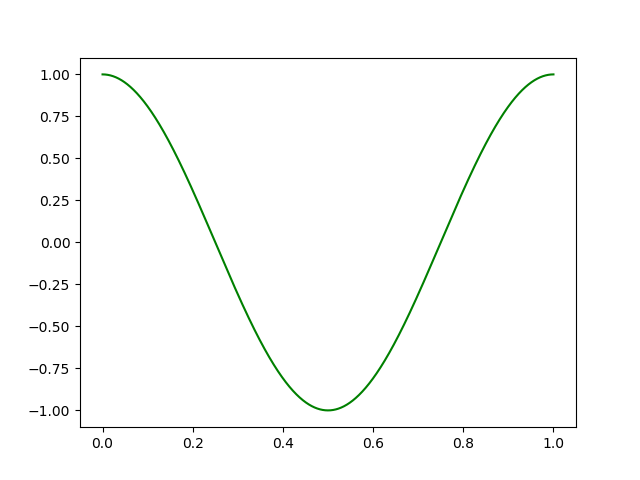

In [2]:
import numpy as np
# Meta data type
dt = np.dtype([('a','d'),('b','d'),('n','int32')])

# Open file
f = open("bin_header.out","rb")
a,b,n = np.fromfile(f,dtype=dt,count=1)[0]


# skip 4 bytes of padding after int32 (read above) 
# Second arg : 0=from start of file; 1=relative to current position; 2=from end of file
f.seek(4,1)
u = np.fromfile(f,dtype='d')

# Plot data
x = np.linspace(a,b,n+1)
plt.figure(4)
plt.plot(x,u,'g-')